## Exploratory data analysis

In this notebook we are going to inspect dataset in order to have some notions of the data provided as well as compare it to the test set.

In [1]:
from collections import Counter

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [2]:
DATA_DIR_TRAIN = "../data/trainSet.csv"
DATA_DIR_TEST = "../data/candidateTestSet.txt"

In [3]:
data = pd.read_csv(DATA_DIR_TRAIN, header=None)

At first we would like to make sure how many different labels do we have and whether our classes are balanced.

In [4]:
data.columns = ["Query", "Label"]
n_unique_labels = len(np.unique(data.loc[:, "Label"]))
n_unique_queries = len(np.unique(data.loc[:, "Query"]))
print(f"Number of records in the data is: {data.shape[0]}", 
      f"Number of unique records in the data is: {n_unique_queries}",
      f"Number of unique labels is: {n_unique_labels}", sep="\n")

Number of records in the data is: 606823
Number of unique records in the data is: 606823
Number of unique labels is: 1419


We can confirm that there are no repeated queries in our training data.

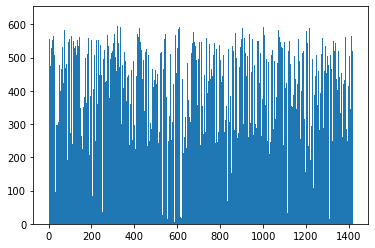

In [18]:
plt.hist(data.loc[:, "Label"], bins = n_unique_labels)
plt.show()

One can observe that many classes appear in the range of 250-550 records, however there are some classes that have much less data as compared to majority. We are going to have a look at them.

In [56]:
count_dict = Counter(data.loc[:, "Label"])
count_df = pd.DataFrame.from_dict(count_dict, orient='index')
count_df = count_df.reset_index(level=0)
count_df.columns = ["Label", "Count"]
count_df_below_100 = count_df[count_df.loc[:, "Count"] < 100].sort_values(by="Count")
classes_below_100 = count_df_below_100.shape[0]
print(f"There are {classes_below_100} classes that have less than 100 occurences in data.")

There are 31 classes that have less than 100 occurences in data.


Let's have a look at some examples of those:

In [71]:
for index in range(5):
    label = count_df_below_100.iloc[index, 0]
    print(data[data.loc[:, "Label"] == label].head(5))

                                       Query  Label
124007  client onboarding investment banking    587
143201                      fintech big data    587
333393      innovation in financial services    587
373542                         m commerce uk    587
                         Query  Label
141516      sage x3 consultant    826
149090        beko engineering    826
190202    cv consultant london    826
208824  informatica consultant    826
321020   recommend a good book    826
                                        Query  Label
55065            whos exempt from bedroom tax   1309
82833             why should people volunteer   1309
208752  who is exempt from paying bedroom tax   1309
291974            exempt from bedroom tax dla   1309
375177                       polish army tent   1309
                                        Query  Label
20116   legal and general investments address    554
26369                           legal general    554
135853    www legalandgeneral com i

We can have a general notion that people from this group are probably not very interested in financial and legal topics.